In [28]:
import sys
sys.path.insert(0, r'C:\Users\julia\OneDrive\Documents\ML Projects\Coffee-Price-Prediction\Ignore')
import pandas as pd
from config import *

In [29]:
coffee_data = get_coffee_price()
coffee_data
df = pd.DataFrame(coffee_data['data'])
df.reset_index(inplace=True)
(df == ".").sum()

index      0
date       0
value    120
dtype: int64

In [30]:
# Drop the last 120 rows because they contain null values
df = df.iloc[:-120]
df

,index,date,value
0,0,2024-12-01,344.118636363636
1,1,2024-11-01,304.952857142857
2,2,2024-10-01,276.777391304348
3,3,2024-09-01,278.760476190476
4,4,2024-08-01,261.437727272727
...,...,...,...
415,415,1990-05-01,92.0199890136719
416,416,1990-04-01,93.7300109863281
417,417,1990-03-01,93.9599914550781
418,418,1990-02-01,84.010009765625


In [31]:
# Download data to a csv file. This way I don't have to call the API every time.

csv_file_path = "coffee_output_data.csv"
df.to_csv(csv_file_path, index=False)
print(f"DataFrame successfully exported to {csv_file_path}")

DataFrame successfully exported to coffee_output_data.csv


## Importing CSV File

In [3]:
# Import csv file

import pandas as pd
df = pd.read_csv(r"C:\Users\julia\OneDrive\Documents\ML Projects\Coffee-Price-Prediction\coffee_output_data.csv")
df

,index,date,value
0,0,2024-12-01,344.118636
1,1,2024-11-01,304.952857
2,2,2024-10-01,276.777391
3,3,2024-09-01,278.760476
4,4,2024-08-01,261.437727
...,...,...,...
415,415,1990-05-01,92.019989
416,416,1990-04-01,93.730011
417,417,1990-03-01,93.959991
418,418,1990-02-01,84.010010


In [4]:
# Delete duplicate index column
df.drop('index', axis=1)

,date,value
0,2024-12-01,344.118636
1,2024-11-01,304.952857
2,2024-10-01,276.777391
3,2024-09-01,278.760476
4,2024-08-01,261.437727
...,...,...
415,1990-05-01,92.019989
416,1990-04-01,93.730011
417,1990-03-01,93.959991
418,1990-02-01,84.010010


In [5]:
# Create function to convert values from cents per pound to dollars per pound

def dollar_per_pound(value):
    # for i in range(len(value)):
    #     value[i] = value[i]  * 0.01
    new_value = value * 0.01
    return round(new_value, 2)

In [6]:
# Apply the function to values

df['new_values'] = df['value'].apply(dollar_per_pound)
df

,index,date,value,new_values
0,0,2024-12-01,344.118636,3.44
1,1,2024-11-01,304.952857,3.05
2,2,2024-10-01,276.777391,2.77
3,3,2024-09-01,278.760476,2.79
4,4,2024-08-01,261.437727,2.61
...,...,...,...,...
415,415,1990-05-01,92.019989,0.92
416,416,1990-04-01,93.730011,0.94
417,417,1990-03-01,93.959991,0.94
418,418,1990-02-01,84.010010,0.84


## Exploratory Data Analysis

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [8]:
df = df.drop(columns = ['index', 'value'])
df

,date,new_values
0,2024-12-01,3.44
1,2024-11-01,3.05
2,2024-10-01,2.77
3,2024-09-01,2.79
4,2024-08-01,2.61
...,...,...
415,1990-05-01,0.92
416,1990-04-01,0.94
417,1990-03-01,0.94
418,1990-02-01,0.84


In [9]:
df.describe()

,new_values
count,420.000000
mean,1.414381
std,0.590541
min,0.510000
25%,0.937500
50%,1.350000
75%,1.730000
max,3.440000


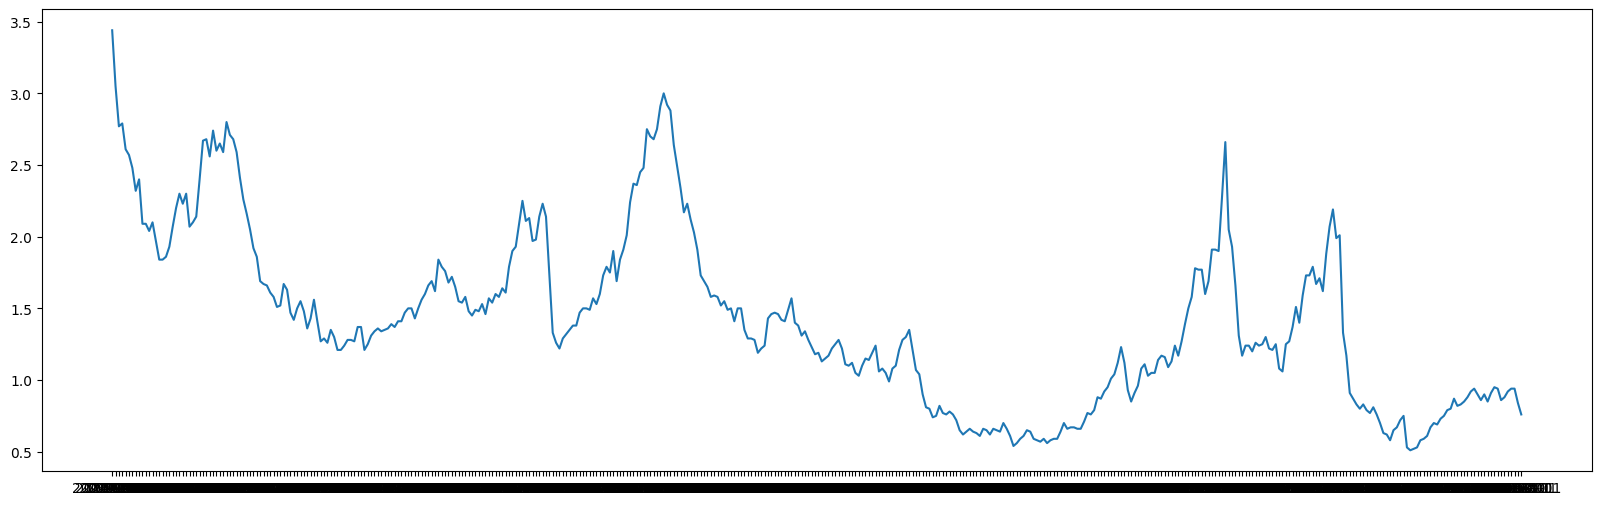

In [12]:
plt.figure(figsize=(20,6))
plt.plot(df['date'], df['new_values'])

plt.show()

In [13]:
df.columns

Index(['date', 'new_values'], dtype='object')

In [14]:
df_yearly = len(df) / 12
df_yearly

35.0

In [ ]:
# Plot the price of coffee for each year

a = 0
years = list(range(2024, 1989, -1))

for i in range(int(df_yearly)):
    data = df[a:a + 12]
    plt.figure(figsize=(15,5))
    plt.plot(data['date'], data['new_values'])
    plt.xlabel('Date')
    plt.ylabel('Dollar per Pound')
    plt.title(f'{years[i]}')
    a += 12

    plt.show()


In [16]:
# Plot the price of coffee for each year on the same plot

a = 0
# years = list(range(2024, 1989, -1))

for i in range(int(df_yearly)):
    data = df[a:a + 12]
    a += 12

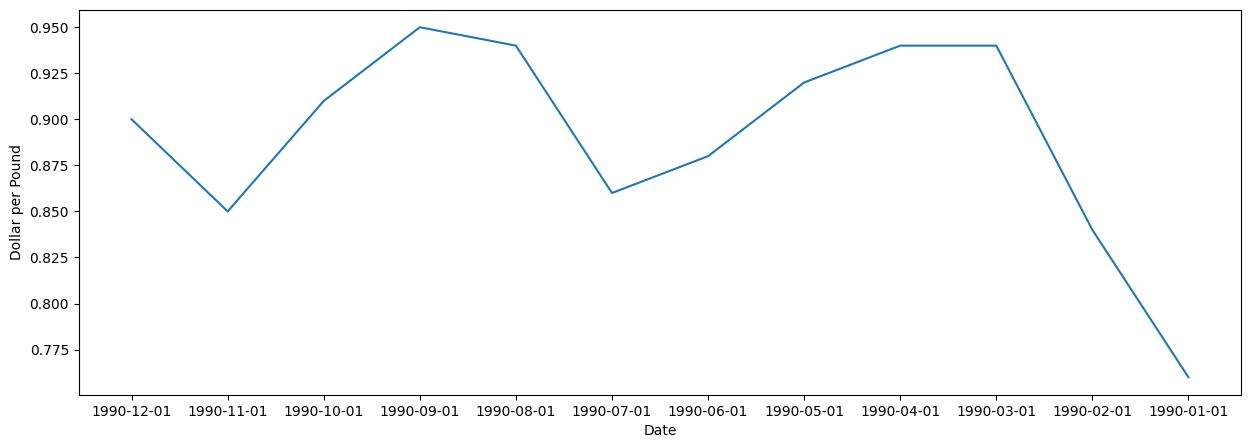

In [17]:
plt.figure(figsize=(15,5))
plt.plot(data['date'], data['new_values'])
plt.xlabel('Date')
plt.ylabel('Dollar per Pound')
# plt.title(f'{years[i]}')
plt.show()

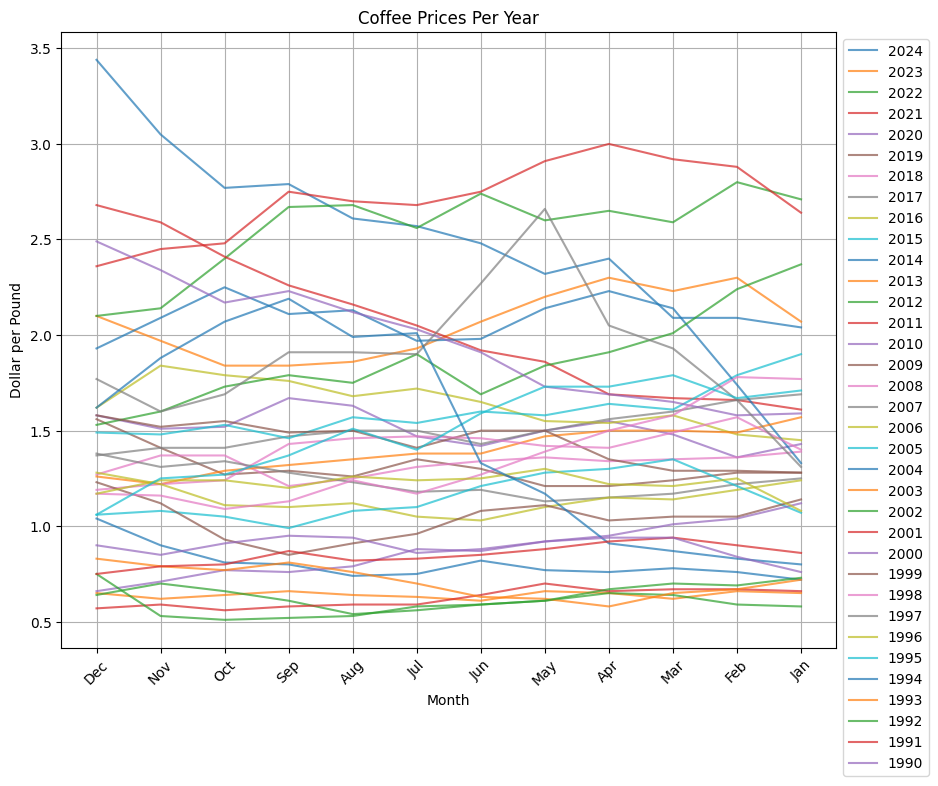

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

a = 0
years = list(range(2024, 1989, -1))

plt.figure(figsize=(10, 8))  # Create a single figure

for i in range(int(df_yearly)):
    data = df[a:a + 12].copy()  # Select 12 months of data
    data['month'] = pd.to_datetime(data['date']).dt.strftime('%b')  # Extract month name
    
    plt.plot(data['month'], data['new_values'], label=f'{years[i]}', alpha=0.7)  # Plot with transparency
    a += 12

plt.xlabel('Month')
plt.ylabel('Dollar per Pound')
plt.title('Coffee Prices Per Year')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside
plt.grid(True)  # Add grid for better readability
plt.xticks(rotation=45)  # Rotate x-axis labels for clarity

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

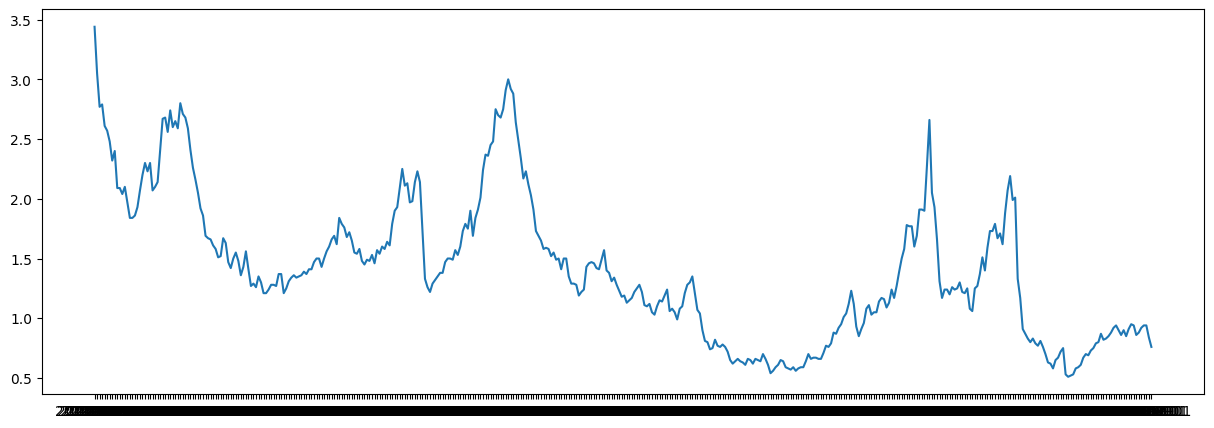

In [27]:
plt.figure(figsize=(15,5))
plt.plot(df['date'], df['new_values'])
plt.show

In [28]:
# Checking for missing values

df.isnull().sum()

date          0
new_values    0
dtype: int64

## Data Preprocessing

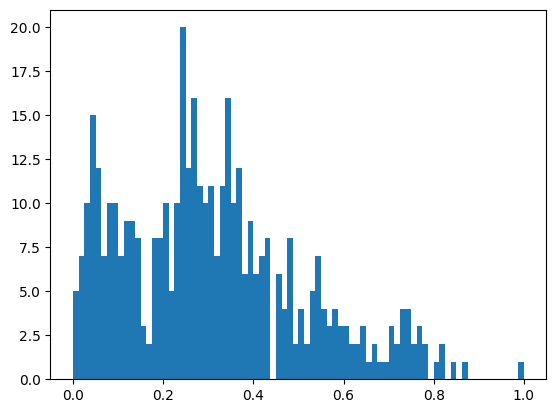

In [51]:
# Normalization: Applying Min-Max Scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_values_scaled = scaler.fit_transform(df['new_values'].values.reshape(-1, 1))
plt.hist(df_scaled, bins = 80)
plt.show()

LSTM models take sequential input data in the form of a 3D array: (samples, timestamps, features)
- Samples: # of training examples (# of available sequences in the dataset)
- Timestamps: # of previous time steps useed to predict the next value
- Features: # of input features at each timestep


In [ ]:
# Creating Sequences
# Choose a sequence length. This means that, for every example, the model will look at the last T days of data to make a prediction

seq_length = 10   # Timestamps
X = []
y = []

for i in range(seq_length, len(df_values_scaled)):
    X.append(df_values_scaled[i-seq_length:i, 0])   # Extract past sequence
    y.append(df_values_scaled[i, 0])   # Next value

X = np.array(X)
y = np.array(y)

print('X shape: ', X.shape)
print('y shape: ', y.shape)



X shape:  (410, 10)
y shape:  (410,)


In [63]:
# Reshape data into 3D format, required by LSTM layers
# (samples, time steps, features)

X = X.reshape((X.shape[0], X.shape[1], 1))
print("New X shape: ", X.shape)

New X shape:  (410, 10, 1)


In [ ]:
# Train-Test Split

train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print('X_train Shape: ', X_train.shape)
print('X_test Shape: ', X_test.shape)
print('y_train Shape: ', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape:  (328, 10, 1)
X_test Shape:  (82, 10, 1)
y_train Shape:  (328,)
y_test Shape: (82,)


# Building LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, AdditiveAttention, Permute, Reshape, Multiply, BatchNormalization

model = Sequential([

# LSTM layers: (return_sequence = True is to ensure the output includes the sequences, essential for stacking LSTM layers.)
    LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),   # Prevent overfitting
    BatchNormalization(),   # Stabilizes the learning process
    LSTM(units=50, activation='relu', return_sequences=True),
    Dropout(0.2),
    BatchNormalization(),
    Dense(units=25, activation='relu'),   # Fully connected layer
    Dense(1),   # Output regression layer
])

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()


C:\Users\julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 10, 50)         │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 10, 50)         │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10, 25)         │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10, 1)          │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,301 (126.18 KB)

 Trainable params: 32,101 (125.39 KB)

 Non-trainable params: 200 (800.00 B)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=41, validation_split=0.2)

TypeError: TensorFlowTrainer.fit() got an unexpected keyword argument 'validation_splits'